# Marching Squares Algorithm

In [1]:
import matplotlib
import matplotlib.pyplot as plt                 # This will import plotting module
import numpy as np

In [2]:
## Generate a random Image to be used:
A = np.random.randint(256, size = (20,20))
print(A)

[[119 255  75 174 187  22 192  58 197 211  93  73  86 152  11 193 192  47
  184  95]
 [255 207 225  14 241 153 176 216  93 175  93  27  26 181 216 242 115 159
   45 242]
 [ 61 115 221  11 162 176 225 223  15 190 187  95 138 255  33 117 181 234
   93 105]
 [248  96  63 187 218  41 211  22 176 251 105 138 244   1  58 101 151 128
  124 104]
 [ 72   2  21 158  41 133 124 213 189 148 235 205 113 170  14 221 150 249
  134 199]
 [196  20 227 209 174 241 233 228 205 151  21 231 218 225 188 129  73 128
  234 165]
 [ 76 183  57 189 140 153 149  54 108 120 232 185  44  19 193  35 175  50
  247  74]
 [197  45 156 218 115 165 250  68  53  45 207  63  94 101 191   0 154  29
  244 208]
 [146  94 230 143 161  46  53   8 191 227 176  63   7 121 179 102 118  96
  250 102]
 [238  81  65  43 128  61 215 129 213  57  49 246 204 135  99 228 226 252
   91 193]
 [ 52  30 180  78  81 148  28   7 152 110  49 236  52 149 200 125 247 221
  132  91]
 [164  51   8 142 103  33 199 201  12  75  91 234 197 220 104  31

In [3]:
#set isovalue
iso_value = 100
#converts all values greater than the isovalue to a 1 and those below the isovalue to a 0
binary_matrix = (A >= iso_value).astype(int)
print(binary_matrix)

[[1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0]
 [1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1]
 [0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]
 [0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0]
 [1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1]
 [1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1]
 [1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1]
 [0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0]
 [1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0]
 [1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1]
 [0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0]
 [1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1]
 [0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1]
 [0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1]
 [0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1]
 [0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0]
 [1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0]]


## Creating a  2d grid for points to lie on:
For the marching Squares Algorithm the points should lie in hte centre of a 2x2 square grid. Hence the size of this grid will be a factor of $2n+1$ bigger than the original image.

Converting the 1s to black spots and the 0s to white spots by getting the position of 1s and 0s. The coordinate system will be defined as the origin in the bottom left.

In [4]:
black = []
white = []

def sort_key(point):
    return point[1] * 100 + point[0] # multiplication ensures that the y has a higher weight in the sorting process (1,0) comes before (0,1) and 

x = binary_matrix.shape[0]-1
y = binary_matrix.shape[1]-1

for i in range(x+1):
    for j in range(y+1):
        if binary_matrix[i][j]==1:
            black.append([x-i,j])
        else:
            white.append([x-i,j])

black = np.array(black)*2 + 1
white = np.array(white)*2 + 1

xblack = [point[0] for point in black]
yblack = [point[1] for point in black]

xwhite = [point[0] for point in white]
ywhite = [point[1] for point in white]

state = {tuple(point): True for point in black}
state.update({tuple(point): False for point in white})
sorted_dict = sorted(state.items(), key=lambda x: sort_key(x[0]))
state_dict = dict(sorted_dict)


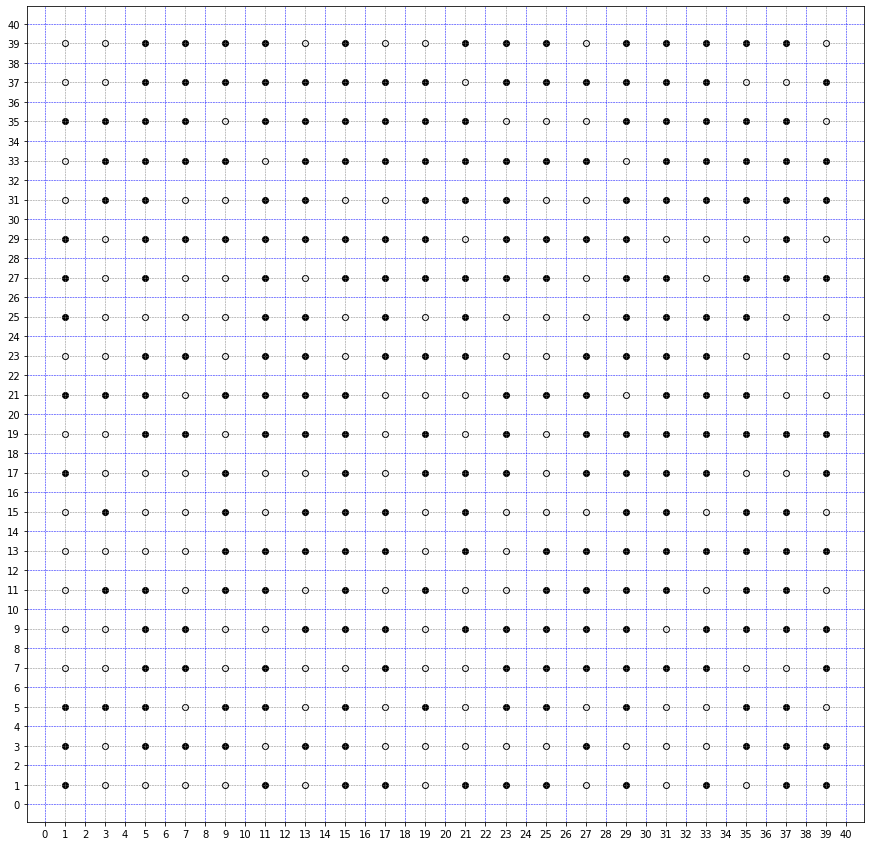

In [5]:
plt.figure(figsize = (15,15))

plt.scatter(xblack,yblack, color = "black")
plt.scatter(xwhite,ywhite, edgecolors = "black", color = "white")

plt.xticks(range(0, int(max(xblack + xwhite)) + 2))
plt.yticks(range(0, int(max(yblack + ywhite)) + 2))

plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')

x_counter = 0
y_counter = 0

for tick in plt.gca().xaxis.get_major_ticks():
    if x_counter % 2 == 0:
        tick.gridline.set_color('blue')  # Change color for even x values
    else:
        tick.gridline.set_color('gray')
    x_counter += 1
for tick in plt.gca().yaxis.get_major_ticks():
    if y_counter % 2 == 0:
        tick.gridline.set_color('blue')  # Change color for even y values
    else:
        tick.gridline.set_color('gray')  
    y_counter += 1    

plt.show()


The next stage of the algorithm is to assign numbered values to the spaces in between each point. This will be done by dividing the grid into 2x2 subgrids each with a point (black or white) in the corners. These four corners shall be given a bit number 1,2,4 and 8. If a corner is black (True) its associated bit value will be added to the sum and then this sum is stored as the identity for that subgrid. This will result in 16 possible values (0-15) that the subgrid can be assigned.

In [6]:
value = []
def get_value(i,j):
    A = int(state_dict[(i    , j    )])
    B = int(state_dict[(i + 2, j    )])
    C = int(state_dict[(i    , j + 2)])
    D = int(state_dict[(i + 2, j + 2)])
    return A + B*2 + C*4 + D*8

values = {}

x_len = max(xblack+xwhite)
y_len = max(yblack+ywhite)

for j in range(1,y_len,2):
    for i in range(1,x_len,2):
        values.update({(i+1,j+1) : get_value(i,j)})
        

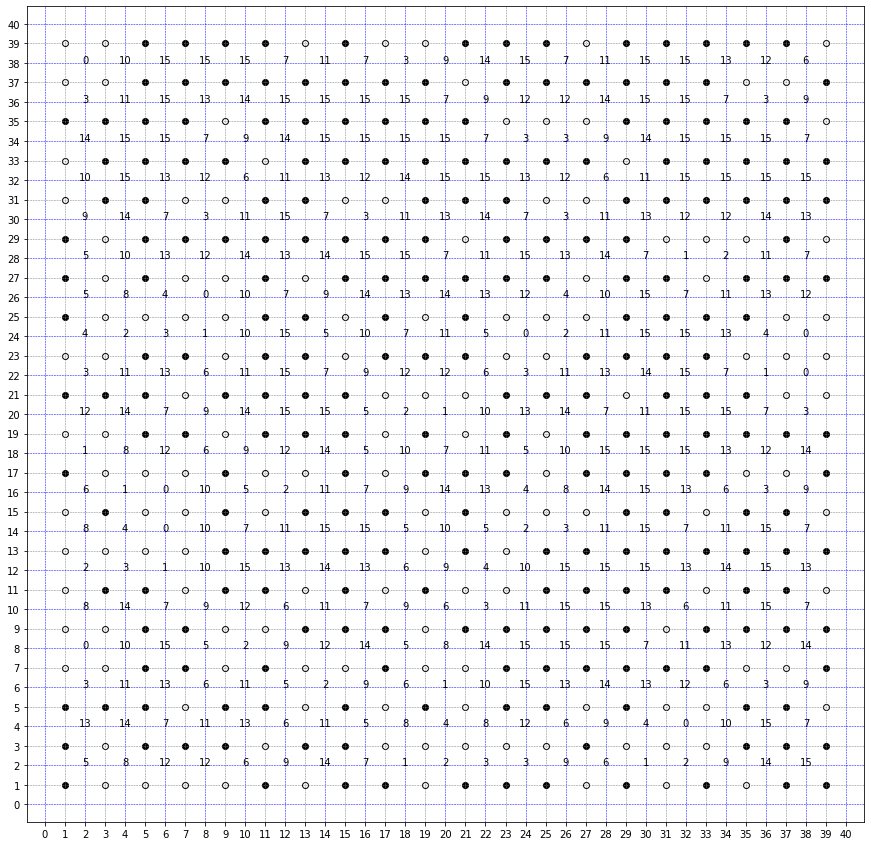

In [7]:
plt.figure(figsize = (15,15))

plt.scatter(xblack,yblack, color = "black")
plt.scatter(xwhite,ywhite, edgecolors = "black", color = "white")

plt.xticks(range(0, int(max(xblack + xwhite)) + 2))
plt.yticks(range(0, int(max(yblack + ywhite)) + 2))

plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')

x_counter = 0
y_counter = 0

x_coords, y_coords = zip(*values.keys())
z_values = list(values.values())

for i, txt in enumerate(z_values):
    plt.annotate(txt, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,0), ha='center')
    
for tick in plt.gca().xaxis.get_major_ticks():
    if x_counter % 2 == 0:
        tick.gridline.set_color('blue')  # Change color for even x values
    else:
        tick.gridline.set_color('gray')
    x_counter += 1
for tick in plt.gca().yaxis.get_major_ticks():
    if y_counter % 2 == 0:
        tick.gridline.set_color('blue')  # Change color for even y values
    else:
        tick.gridline.set_color('gray')  
    y_counter += 1    

plt.show()


## Contour Lines

There are 15 possible cases that are number dependent, these correspond to the shape of the contour line. A diagram displaying this can be seen below.
![CasesMarchingSquares.jpeg](CasesMarchingSquares.jpeg)

In [8]:
def Segment(start,end):
    plt.plot([start[0],end[0]],[start[1],end[1]],color = "blue")
    return start,end

def generate_edges(i,j,index):
    x,y = i,j 
    vector = []
    if index == 0 or index == 15:
        return 
    elif index == 1 or index == 14:
        start = (x+1,y)
        end = (x,y+1)
        vector.append(Segment(start,end))
    elif index == 2 or index == 13:
        start = (x+1,y)
        end = (x+2,y+1)
        vector.append(Segment(start,end))
    elif index == 3 or index == 12:
        start = (x,y+1)
        end = (x+2,y+1)
        vector.append(Segment(start,end))
    elif index == 7 or index == 8:
        start = (x+2,y+1)
        end = (x+1,y+2)
        vector.append(Segment(start,end))
    elif index == 9:
        start = (x,y+1)
        end = (x+1,y+2)
        vector.append(Segment(start,end))
        start = (x+1,y)
        end = (x+2,y+1)
        vector.append(Segment(start,end))
    elif index == 5 or index == 10:
        start = (x+1,y)
        end = (x+1,y+2)
        vector.append(Segment(start,end))
    elif index == 4 or index == 11:
        start = (x,y+1)
        end = (x+1,y+2)
        vector.append(Segment(start,end))
    elif index == 6:
        start = (x+2,y+1)
        end = (x+1,y+2)
        vector.append(Segment(start,end))
        start = (x+1,y)
        end = (x,y+1)
        vector.append(Segment(start,end))
    return vector

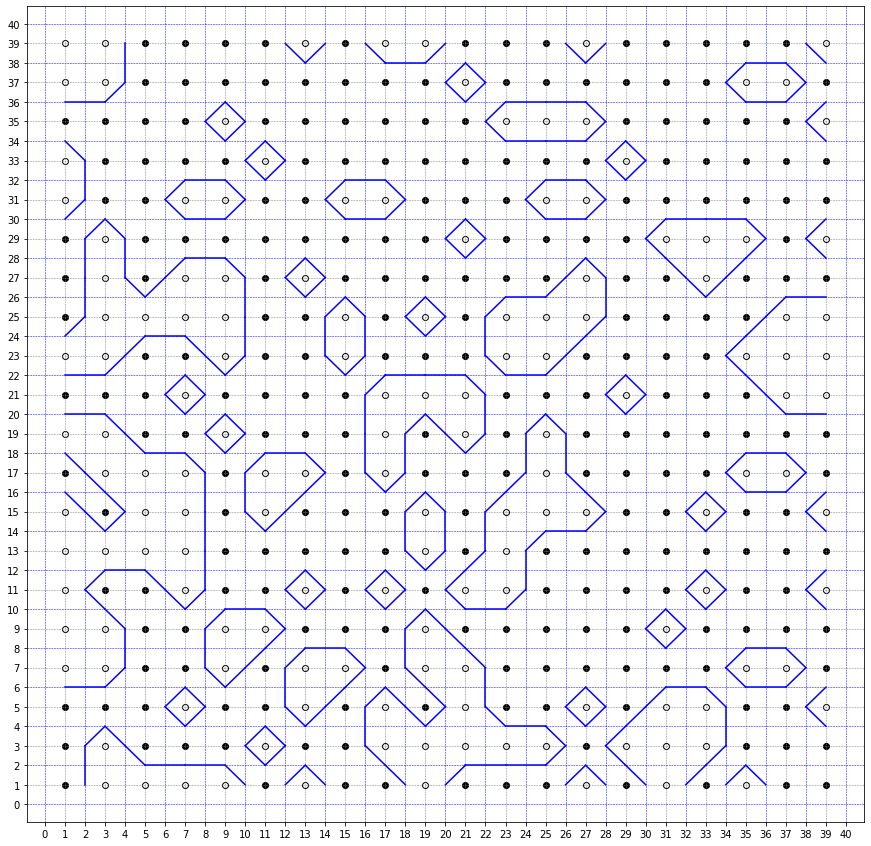

In [9]:
plt.figure(figsize = (15,15))

plt.scatter(xblack,yblack, color = "black")
plt.scatter(xwhite,ywhite, edgecolors = "black", color = "white")

plt.xticks(range(0, int(max(xblack + xwhite)) + 2))
plt.yticks(range(0, int(max(yblack + ywhite)) + 2))

plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')

x_counter = 0
y_counter = 0

x_coords, y_coords = zip(*values.keys())
z_values = list(values.values())

# for i, txt in enumerate(z_values):
#     plt.annotate(txt, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,0), ha='center')
    
for tick in plt.gca().xaxis.get_major_ticks():
    if x_counter % 2 == 0:
        tick.gridline.set_color('blue')  # Change color for even x values
    else:
        tick.gridline.set_color('gray')
    x_counter += 1
for tick in plt.gca().yaxis.get_major_ticks():
    if y_counter % 2 == 0:
        tick.gridline.set_color('blue')  # Change color for even y values
    else:
        tick.gridline.set_color('gray')  
    y_counter += 1    

x_len = max(xblack+xwhite)
y_len = max(yblack+ywhite)

values = {}

vectors = []

for j in range(1,y_len,2):
    for i in range(1,x_len,2):
        index = get_value(i,j)
        values.update({(i+1,j+1) : index})
        vectors.append(generate_edges(i,j,index))
plt.show()

vectors = [x for x in vectors if x is not None] #filtering None values

## Split into vector shapes

Need to split into seperate vectors, so if a points starting point matches with another points end point then those points will be stored together in one vector. 
1. Choose first point in array and take note of its start and end point
2. Put these into a shape array
3. Loop through the vector array to see if there is a segment who's starting or end point that is the same as the shape point being compared to.
4. If true then pop out the two vertices and store in a vector and repeat with the new end point from the second segment.
5. If false then pop out the two vertices and look at the next element in the array and repeat the process.

In [10]:
# print(vectors[1][0][1])
# print(vectors[0][0][0])
# print(vectors[0][0][1])
# print(vectors)

In [11]:
# Initialize empty list to store shapes
shapes = []
# Initialize set to keep track of indices of vectors that need to be removed
indices_to_remove = set(range(len(vectors)))

# Iterate until there are no more vectors to process
while indices_to_remove:
    # Initialize a new shape
    shape = []
    # Get the start and end points of the first vector in the list of vectors
    start_point, end_point = vectors[indices_to_remove.pop()][0]
    # Add the start and end points to the shape
    shape.extend([start_point, end_point])
    # Flag to check if a match is found
    matched = True
    
    # Continue until no more matches are found
    while matched:
        # Reset match flag
        matched = False
        # Iterate through indices of vectors to remove
        for idx in list(indices_to_remove):
            # Get the vector at the current index
            vec = vectors[idx]
            # Check if the start point of the vector matches the end point of the shape
            if vec[0][0] == end_point:
                # Update the end point and append it to the shape
                end_point = vec[0][1]
                shape.append(end_point)
                # Remove the index from the set of indices to remove
                indices_to_remove.remove(idx)
                # Set matched flag to True
                matched = True
                # Exit the loop to start the next iteration
                break
            # Check if the end point of the vector matches the end point of the shape
            elif vec[0][1] == end_point:
                # Update the end point and append it to the shape
                end_point = vec[0][0]
                shape.append(end_point)
                # Remove the index from the set of indices to remove
                indices_to_remove.remove(idx)
                # Set matched flag to True
                matched = True
                # Exit the loop to start the next iteration
                break
            # Check if the vector has two points and either point matches the end point of the shape
            elif len(vec) == 2 and (vec[1][0] == end_point or vec[1][1] == end_point):
                # Update the end point accordingly and append it to the shape
                end_point = vec[1][1] if vec[1][0] == end_point else vec[1][0]
                shape.append(end_point)
                # Remove the index from the set of indices to remove
                indices_to_remove.remove(idx)
                # Set matched flag to True
                matched = True
                # Exit the loop to start the next iteration
                break
                
    # Add the completed shape to the list of shapes
    shapes.append(shape)




### Linear Interpolation

In [12]:
#set isovalue
iso_value = 100
#converts all values greater than the isovalue to a 1 and those below the isovalue to a 0
x,y = A.shape
relative_matrix = np.zeros((x*2+1,y*2+1))
true_state = {}
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i,j] > iso_value:
            relative_matrix[2*i+1,2*j+1] = 1
            true_state.update({(2*i+1,2*j+1):1})
        else:
            relative_matrix[2*i+1,2*j+1] = A[i,j]/iso_value
            true_state.update({(2*i+1,2*j+1):A[i,j]/iso_value})


In [13]:
print(true_state)

{(1, 1): 1, (1, 3): 1, (1, 5): 0.75, (1, 7): 1, (1, 9): 1, (1, 11): 0.22, (1, 13): 1, (1, 15): 0.58, (1, 17): 1, (1, 19): 1, (1, 21): 0.93, (1, 23): 0.73, (1, 25): 0.86, (1, 27): 1, (1, 29): 0.11, (1, 31): 1, (1, 33): 1, (1, 35): 0.47, (1, 37): 1, (1, 39): 0.95, (3, 1): 1, (3, 3): 1, (3, 5): 1, (3, 7): 0.14, (3, 9): 1, (3, 11): 1, (3, 13): 1, (3, 15): 1, (3, 17): 0.93, (3, 19): 1, (3, 21): 0.93, (3, 23): 0.27, (3, 25): 0.26, (3, 27): 1, (3, 29): 1, (3, 31): 1, (3, 33): 1, (3, 35): 1, (3, 37): 0.45, (3, 39): 1, (5, 1): 0.61, (5, 3): 1, (5, 5): 1, (5, 7): 0.11, (5, 9): 1, (5, 11): 1, (5, 13): 1, (5, 15): 1, (5, 17): 0.15, (5, 19): 1, (5, 21): 1, (5, 23): 0.95, (5, 25): 1, (5, 27): 1, (5, 29): 0.33, (5, 31): 1, (5, 33): 1, (5, 35): 1, (5, 37): 0.93, (5, 39): 1, (7, 1): 1, (7, 3): 0.96, (7, 5): 0.63, (7, 7): 1, (7, 9): 1, (7, 11): 0.41, (7, 13): 1, (7, 15): 0.22, (7, 17): 1, (7, 19): 1, (7, 21): 1, (7, 23): 1, (7, 25): 1, (7, 27): 0.01, (7, 29): 0.58, (7, 31): 1, (7, 33): 1, (7, 35): 1, (7

In [14]:
def Segment(start,end):
    plt.plot([start[0],end[0]],[start[1],end[1]],color = "blue")
    return start,end

def generate_edges(i,j,index):
    x,y = i,j 
    vector = []
    if index == 0 or index == 15:
        return 
    elif index == 1 or index == 14:
        try:
            start = (x+1,y)
            end = (x,y+1)
            Px = x+2*((1-true_state[(x+2,y)])/(true_state[(x,y)]-true_state[(x+2,y)]))
            Py = 0
            Qx = 0
            Qy = y+2*((1-true_state[(x,y+2)])/(true_state[(x,y)]-true_state[(x,y+2)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 2 or index == 13:
        try:
            start = (x+1,y)
            end = (x+2,y+1)
            Px = x+2*((1-true_state[(x+2,y)])/(true_state[(x,y)]-true_state[(x+2,y)]))
            Py = 0
            Qx = 2
            Qy = y+2*((1-true_state[(x+2,y+2)])/(true_state[(x+2,y)]-true_state[(x+2,y+2)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 3 or index == 12:
        try:
            start = (x,y+1)
            end = (x+2,y+1)
            Px = 0
            Py = y+2*((1-true_state[(x,y+2)])/(true_state[(x,y)]-true_state[(x,y+2)]))
            Qx = 2
            Qy = y+2*((1-true_state[(x+2,y+2)])/(true_state[(x+2,y)]-true_state[(x+2,y+2)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 7 or index == 8:
        try:
            start = (x+2,y+1)
            end = (x+1,y+2)
            Px = 2
            Py = y+2*((1-true_state[(x+2,y+2)])/(true_state[(x+2,y)]-true_state[(x+2,y+2)]))
            Qx = x+2*((1-true_state[(x+2,y+2)])/(true_state[(x,y+2)]-true_state[(x+2,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 9:
        try:
            start = (x,y+1)
            end = (x+1,y+2)
            Px = 0
            Py = y+2*((1-true_state[(x,y+2)])/(true_state[(x,y)]-true_state[(x,y+2)]))
            Qx = x+2*((1-true_state[(x+2,y+2)])/(true_state[(x,y+2)]-true_state[(x+2,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
            start = (x+1,y)
            end = (x+2,y+1)
            Px = x+2*((1-true_state[(x+2,y)])/(true_state[(x,y)]-true_state[(x+2,y)]))
            Py = 0
            Qx = 0
            Qy = y+2*((1-true_state[(x,y+2)])/(true_state[(x,y)]-true_state[(x,y+2)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 5 or index == 10:
        try:
            start = (x+1,y)
            end = (x+1,y+2)
            Px = x+2*((1-true_state[(x+2,y)])/(true_state[(x,y)]-true_state[(x+2,y)]))
            Py = 0
            Qx = x+2*((1-true_state[(x+2,y+2)])/(true_state[(x,y+2)]-true_state[(x+2,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 4 or index == 11:
        try:
            start = (x,y+1)
            end = (x+1,y+2)
            Px = 0
            Py = y+2*((1-true_state[(x,y+2)])/(true_state[(x,y)]-true_state[(x,y+2)]))
            Qx = x+2*((1-true_state[(x+2,y+2)])/(true_state[(x,y+2)]-true_state[(x+2,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 6:
        try:
            start = (x+2,y+1)
            end = (x+1,y+2)
            Px = 2
            Py = y+2*((1-true_state[(x+2,y+2)])/(true_state[(x+2,y)]-true_state[(x+2,y+2)]))
            Qx = x+2*((1-true_state[(x+2,y+2)])/(true_state[(x,y+2)]-true_state[(x+2,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
            start = (x+1,y)
            end = (x,y+1)
            Px = x+2*((1-true_state[(x+2,y)])/(true_state[(x,y)]-true_state[(x+2,y)]))
            Py = 0
            Qx = 0
            Qy = y+2*((1-true_state[(x,y+2)])/(true_state[(x,y)]-true_state[(x,y+2)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    return vector

In [15]:
def Segment(start,end):
    plt.plot([start[0],end[0]],[start[1],end[1]],color = "blue")
    return start,end

def generate_edges(i,j,index):
    x,y = i,j 
    vector = []
    if index == 0 or index == 15:
        return 
    elif index == 1 or index == 14:
        try:
            start = (x+1,y)
            end = (x,y+1)
            Px = x+2*((1-true_state[(x,y)])/(true_state[(x+2,y)]-true_state[(x,y)]))
            Py = 0
            Qx = 0
            Qy = y+2*((1-true_state[(x,y)])/(true_state[(x,y+2)]-true_state[(x,y)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 2 or index == 13:
        try:
            start = (x+1,y)
            end = (x+2,y+1)
            Px = x+2*((1-true_state[(x,y)])/(true_state[(x+2,y)]-true_state[(x,y)]))
            Py = 0
            Qx = 2
            Qy = y+2*((1-true_state[(x+2,y)])/(true_state[(x+2,y+2)]-true_state[(x+2,y)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 3 or index == 12:
        try:
            start = (x,y+1)
            end = (x+2,y+1)
            Px = 0
            Py = y+2*((1-true_state[(x,y)])/(true_state[(x,y+2)]-true_state[(x,y)]))
            Qx = 2
            Qy = y+2*((1-true_state[(x+2,y)])/(true_state[(x+2,y+2)]-true_state[(x+2,y)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 7 or index == 8:
        try:
            start = (x+2,y+1)
            end = (x+1,y+2)
            Px = 2
            Py = y+2*((1-true_state[(x+2,y)])/(true_state[(x+2,y+2)]-true_state[(x+2,y)]))
            Qx = x+2*((1-true_state[(x,y+2)])/(true_state[(x+2,y+2)]-true_state[(x,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 9:
        try:
            start = (x,y+1)
            end = (x+1,y+2)
            Px = 0
            Py = y+2*((1-true_state[(x,y)])/(true_state[(x,y+2)]-true_state[(x,y)]))
            Qx = x+2*((1-true_state[(x,y+2)])/(true_state[(x+2,y+2)]-true_state[(x,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
            start = (x+1,y)
            end = (x+2,y+1)
            Px = x+2*((1-true_state[(x,y)])/(true_state[(x+2,y)]-true_state[(x,y)]))
            Py = 0
            Qx = 0
            Qy = y+2*((1-true_state[(x,y)])/(true_state[(x,y+2)]-true_state[(x,y)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 5 or index == 10:
        try:
            start = (x+1,y)
            end = (x+1,y+2)
            Px = x+2*((1-true_state[(x,y)])/(true_state[(x+2,y)]-true_state[(x,y)]))
            Py = 0
            Qx = x+2*((1-true_state[(x,y+2)])/(true_state[(x+2,y+2)]-true_state[(x,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 4 or index == 11:
        try:
            start = (x,y+1)
            end = (x+1,y+2)
            Px = 0
            Py = y+2*((1-true_state[(x,y)])/(true_state[(x,y+2)]-true_state[(x,y)]))
            Qx = x+2*((1-true_state[(x,y+2)])/(true_state[(x+2,y+2)]-true_state[(x,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    elif index == 6:
        try:
            start = (x+2,y+1)
            end = (x+1,y+2)
            Px = 2
            Py = y+2*((1-true_state[(x+2,y)])/(true_state[(x+2,y+2)]-true_state[(x+2,y)]))
            Qx = x+2*((1-true_state[(x,y+2)])/(true_state[(x+2,y+2)]-true_state[(x,y+2)]))
            Qy = 2
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
            start = (x+1,y)
            end = (x,y+1)
            Px = x+2*((1-true_state[(x,y)])/(true_state[(x+2,y)]-true_state[(x,y)]))
            Py = 0
            Qx = 0
            Qy = y+2*((1-true_state[(x,y)])/(true_state[(x,y+2)]-true_state[(x,y)]))
            start = (Px,Py)
            end = (Qx,Qy)
            vector.append(Segment(start,end))
        except (ZeroDivisionError, ValueError):
            print(f'({x,y})')
    return vector

((1, 1))
((3, 1))
((17, 1))
((23, 1))
((25, 1))
((33, 1))
((1, 3))
((3, 3))
((15, 3))
((23, 3))
((25, 3))
((29, 3))
((33, 3))
((37, 3))
((7, 5))
((9, 5))
((11, 5))
((13, 5))
((15, 5))
((17, 5))
((29, 5))
((33, 5))
((35, 5))
((37, 5))
((3, 7))
((7, 7))
((9, 7))
((11, 7))
((13, 7))
((15, 7))
((17, 7))
((33, 7))
((35, 7))
((1, 9))
((3, 9))
((9, 9))
((11, 9))
((13, 9))
((17, 9))
((1, 11))
((3, 11))
((5, 11))
((7, 11))
((11, 11))
((13, 11))
((23, 11))
((1, 13))
((3, 13))
((7, 13))
((9, 13))
((11, 13))
((23, 13))
((25, 13))
((27, 13))
((3, 15))
((7, 15))
((9, 15))
((17, 15))
((19, 15))
((1, 17))
((3, 17))
((5, 17))
((7, 17))
((9, 17))
((11, 17))
((13, 17))
((17, 17))
((19, 17))
((21, 17))
((25, 17))
((3, 19))
((5, 19))
((7, 19))
((9, 19))
((15, 19))
((23, 19))
((25, 19))
((27, 19))
((29, 19))
((35, 19))
((5, 21))
((7, 21))
((9, 21))
((15, 21))
((21, 21))
((27, 21))
((29, 21))
((33, 21))
((35, 21))
((5, 23))
((7, 23))
((9, 23))
((17, 23))
((19, 23))
((21, 23))
((25, 23))
((27, 23))
((33, 23))

/tmp/ipykernel_140157/3507532132.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  Qx = x+2*((1-true_state[(x,y+2)])/(true_state[(x+2,y+2)]-true_state[(x,y+2)]))
/tmp/ipykernel_140157/3507532132.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  Px = x+2*((1-true_state[(x,y)])/(true_state[(x+2,y)]-true_state[(x,y)]))


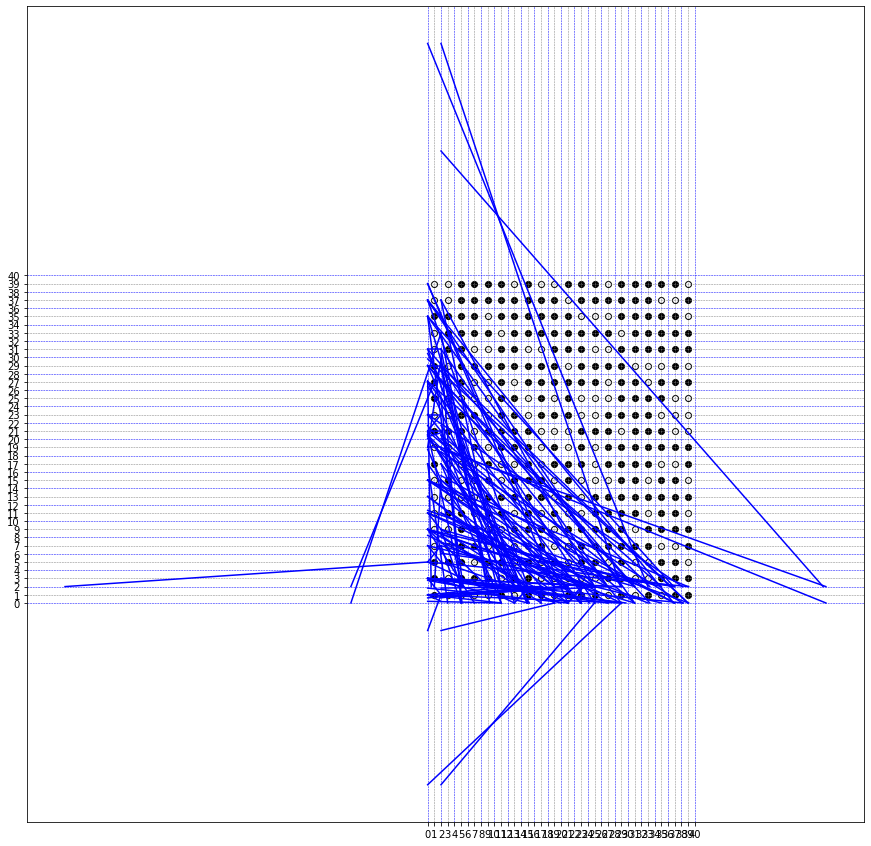

In [16]:
plt.figure(figsize = (15,15))

plt.scatter(xblack,yblack, color = "black")
plt.scatter(xwhite,ywhite, edgecolors = "black", color = "white")

plt.xticks(range(0, int(max(xblack + xwhite)) + 2))
plt.yticks(range(0, int(max(yblack + ywhite)) + 2))

plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')

x_counter = 0
y_counter = 0

x_coords, y_coords = zip(*values.keys())
z_values = list(values.values())

# for i, txt in enumerate(z_values):
#     plt.annotate(txt, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,0), ha='center')
    
for tick in plt.gca().xaxis.get_major_ticks():
    if x_counter % 2 == 0:
        tick.gridline.set_color('blue')  # Change color for even x values
    else:
        tick.gridline.set_color('gray')
    x_counter += 1
for tick in plt.gca().yaxis.get_major_ticks():
    if y_counter % 2 == 0:
        tick.gridline.set_color('blue')  # Change color for even y values
    else:
        tick.gridline.set_color('gray')  
    y_counter += 1    

x_len = max(xblack+xwhite)
y_len = max(yblack+ywhite)

values = {}

vectors = []

for j in range(1,y_len,2):
    for i in range(1,x_len,2):
        index = get_value(i,j)
        values.update({(i+1,j+1) : index})
        vectors.append(generate_edges(i,j,index))
plt.show()

vectors = [x for x in vectors if x is not None] #filtering None values